In [1]:
# 导入所需要的库
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 股票代号
stock_0 = 'SH600519' #贵州茅台

# 输入年份（如年报数据只到2016年，则输入2017）
year = 2017

In [9]:
# 读取csv文件，转化为DataFrame格式
def get_all_data(stock_id):
    # 读取利润表数据
    lrb = pd.read_csv(
        r'data/%s_lrb.csv' % (stock_id),
        encoding='utf-8',
        header=0,
        index_col=None)

    list_lrb = []
    for i in lrb['报表期截止日']:
        str_i = str(i)
        # i_ = i[:4] + '-' + i[4:6] + '-' + i[6:8]
        list_lrb.append(str(i))
    list_lrb_0 = []
    for i in list_lrb:
        i_ = i[:4] + '-' + i[4:6] + '-' + i[6:8]
        list_lrb_0.append(i_)

    lrb['报告时间'] = [pd.to_datetime(t) for t in list_lrb_0]

    lrb.index = lrb['报告时间']

    data = lrb[::-1]
    return data

In [11]:
# 根据月份筛选数据，如12月为年报数据
def get_data_month(data, month):
    data_month = data[data.index.month == month]
    return data_month

In [13]:
# 筛选、计算需要的数据
def get_data_ratio(data):
    result = pd.DataFrame()
    
    result['营业收入'] = data['营业收入']
    result['归母净利润'] = data['归属于母公司所有者的净利润']
    result['营业利润'] = data['营业利润']
      
    result['营业利润率'] = data['营业利润'] / data['营业收入']
    result['净利率'] = data['归属于母公司所有者的净利润'] / data['营业收入']
    result['毛利率'] = (data['营业收入'] - data['营业成本']) / data['营业收入']
    
    result.index = data['报告时间']
    return result

In [17]:
# 根据数据进行作图
def data_plot(data, ratio, legend='贵州茅台', kind='bar'):
    l_0 = len(data)
    s_0 = list(range(l_0))
    x_0 = np.array(s_0)
    y_0 = tuple([str(i) for i in range(year - l_0, year)])
    
    data[ratio].plot(kind=kind)
    plt.title(ratio)
#     plt.ylabel(ratio)
#     plt.legend([legend], loc='upper left')
    plt.legend([legend])
    plt.xticks(x_0, y_0)
    plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y',alpha=0.4)
    plt.savefig(r'pic/%s.png' % (ratio,))
#     plt.show();
    return

In [10]:
# 读取茅台利润表数据
data = get_all_data(stock_0)

In [12]:
# 将年报数据筛选出来
data_year = get_data_month(data, 12)

In [15]:
# 筛选所需数据
result = get_data_ratio(data_year)

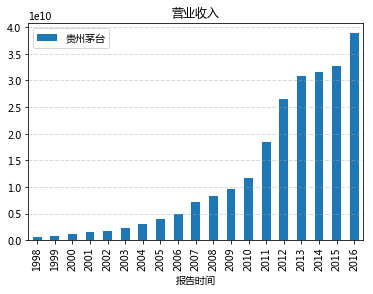

In [19]:
# 作图并保存
data_plot(result, '营业收入')
# 图片显示出来
plt.show()

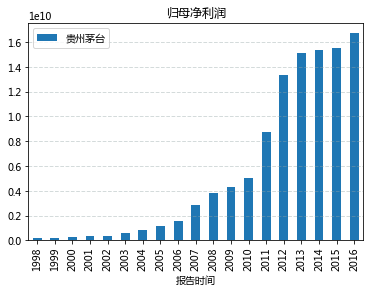

In [20]:
# 作图并保存
data_plot(result, '归母净利润')
# 图片显示出来
plt.show()